In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits

from raytracerthing import RayTracerThing

%matplotlib inline

np.random.seed(42)

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits['images']
X = X / X.max()
N = X.shape[0]
image_shape = X.shape[1:]

print(N, image_shape)

1797 (8, 8)


In [4]:
y = digits['target']

print(y[:5])

[0 1 2 3 4]


In [5]:
detector_shape = (8, 8)

a = RayTracerThing(input_shape=image_shape, output_shape=detector_shape, n_layers=3)
a.enable_full_transparency()

In [6]:
%%time 

outputs = [a.forward(image) for image in X[:10]]    
outputs = np.array(outputs)

CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 60.1 ms


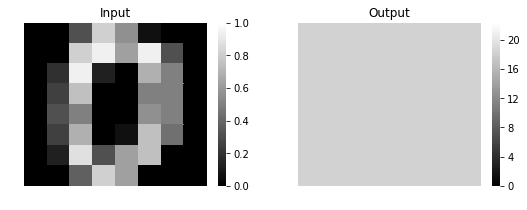

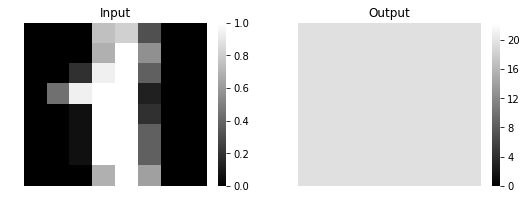

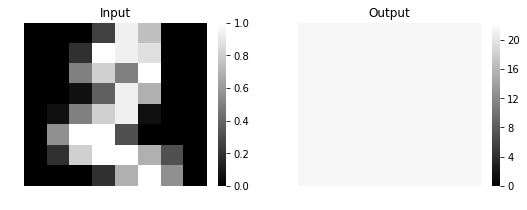

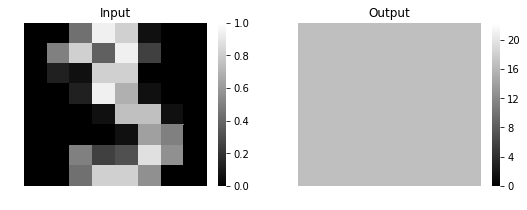

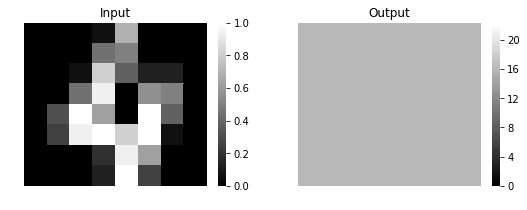

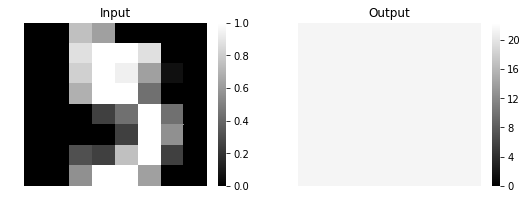

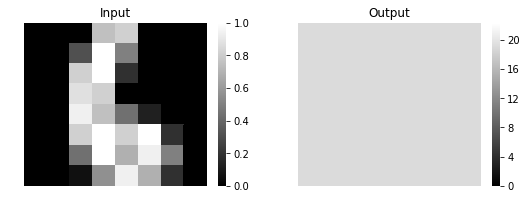

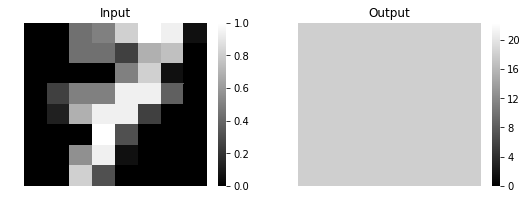

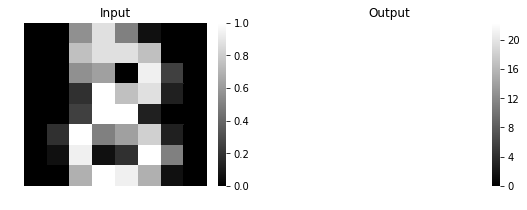

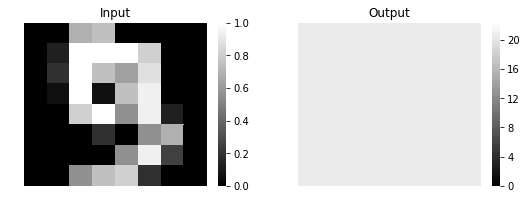

In [7]:
vmax = max(1.0, outputs.max())

for image, output in zip(X[:10], outputs[:10]):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    ax = axes[0]    
    ax = sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Input')
    
    ax = axes[1]    
    ax = sns.heatmap(output, vmin=0.0, vmax=vmax, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Output')

In [8]:
detector_shape = (8, 8)

b = RayTracerThing(input_shape=image_shape, output_shape=detector_shape, n_layers=3)

In [9]:
%%time 

outputs = [b.forward(image) for image in X[:10]]    
outputs = np.array(outputs)

CPU times: user 62.5 ms, sys: 0 ns, total: 62.5 ms
Wall time: 63 ms


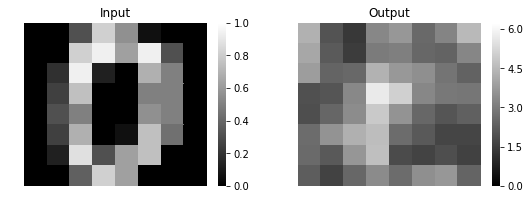

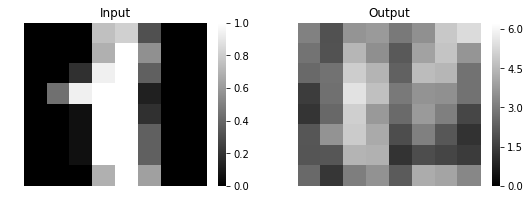

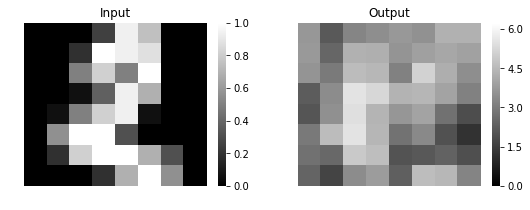

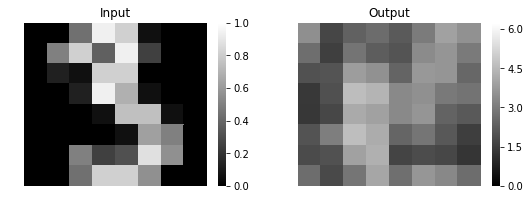

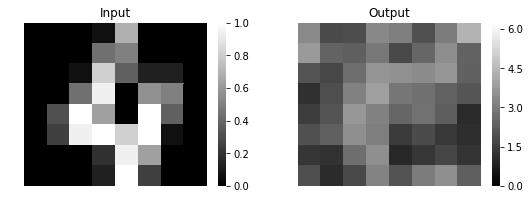

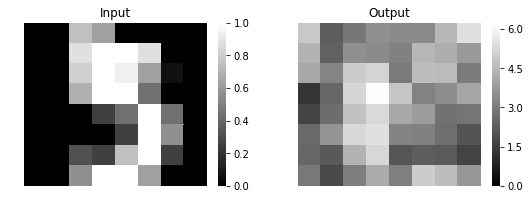

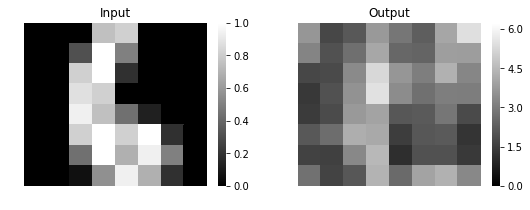

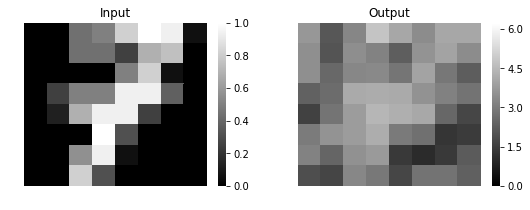

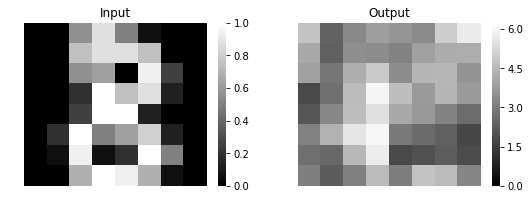

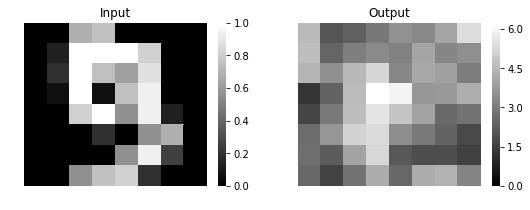

In [10]:
vmax = max(1.0, outputs.max())

for image, output in zip(X[:10], outputs[:10]):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    ax = axes[0]    
    ax = sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Input')
    
    ax = axes[1]    
    ax = sns.heatmap(output, vmin=0.0, vmax=vmax, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Output')

In [11]:
detector_shape = (1, 10)

c = RayTracerThing(input_shape=image_shape, output_shape=detector_shape, n_layers=3)

In [12]:
%%time 

outputs = [c.forward(image) for image in X[:10]]    
outputs = np.array(outputs)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 8.95 ms


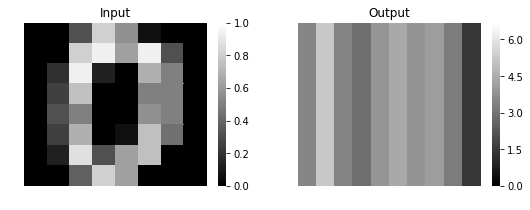

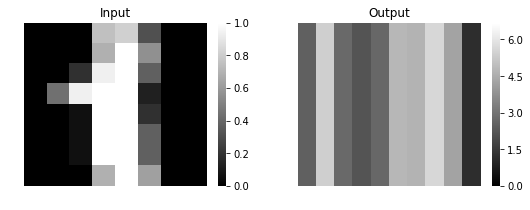

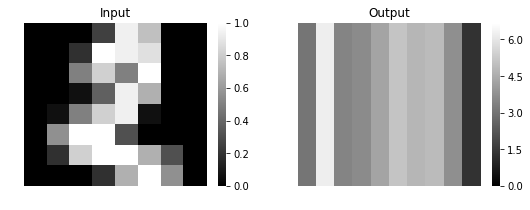

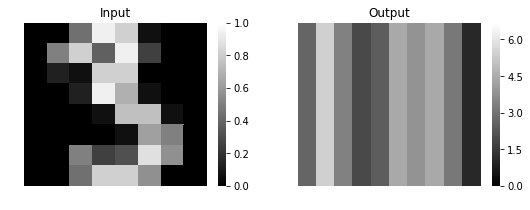

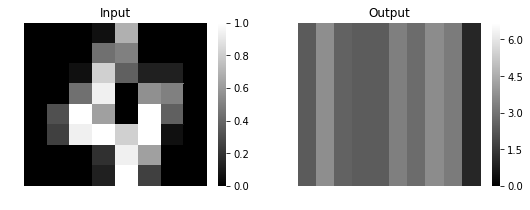

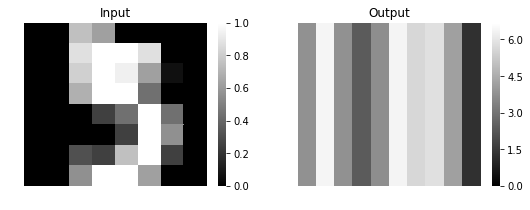

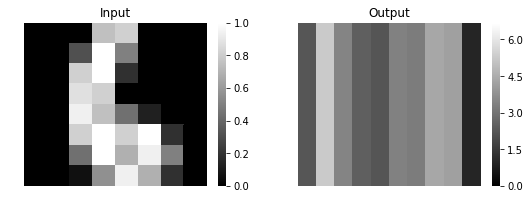

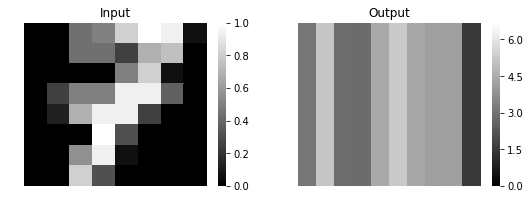

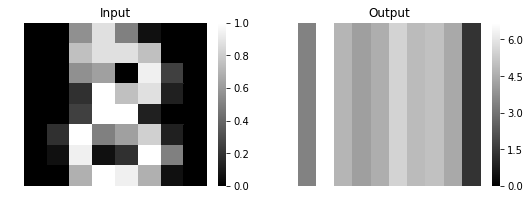

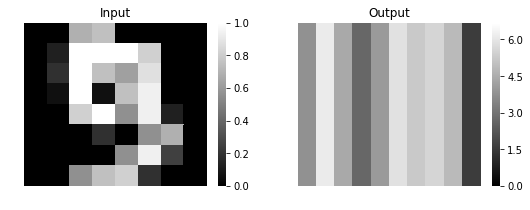

In [13]:
vmax = max(1.0, outputs.max())

for image, output in zip(X[:10], outputs[:10]):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    ax = axes[0]    
    ax = sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Input')
    
    ax = axes[1]    
    ax = sns.heatmap(output, vmin=0.0, vmax=vmax, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Output')

In [14]:
%%time 

detector_shape = (1, 10)
layer_shape = (8, 10)

d = RayTracerThing(input_shape=image_shape, output_shape=detector_shape, hidden_layer_shape=layer_shape, n_layers=3)

CPU times: user 62.5 ms, sys: 15.6 ms, total: 78.1 ms
Wall time: 50.2 ms


In [15]:
%%time 

outputs = [d.forward(image) for image in X[:10]]    
outputs = np.array(outputs)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.25 ms


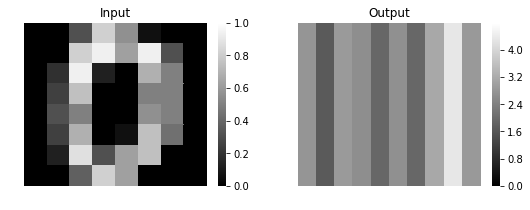

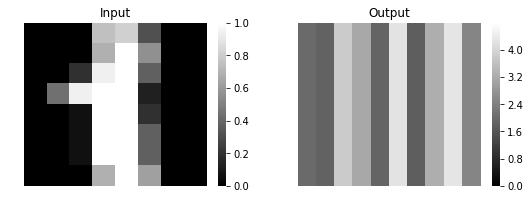

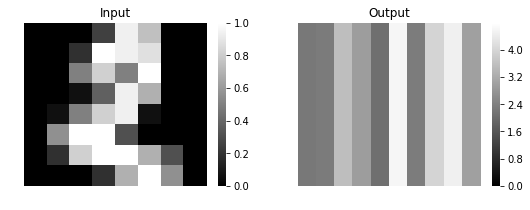

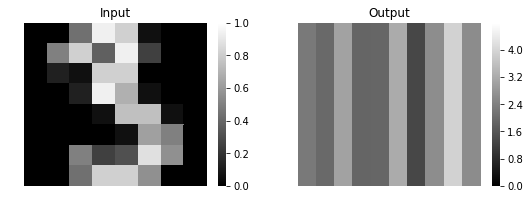

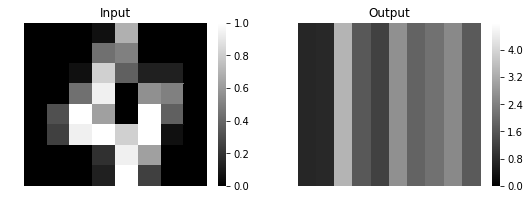

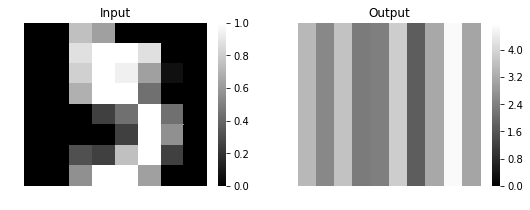

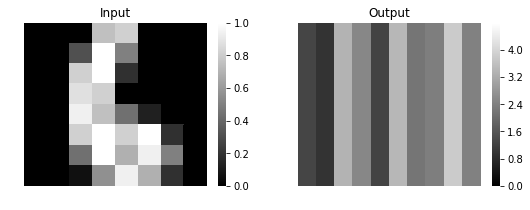

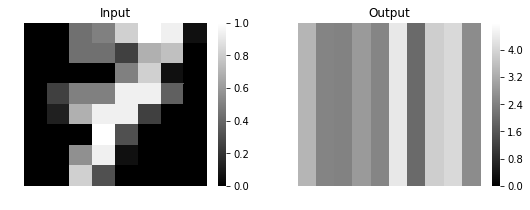

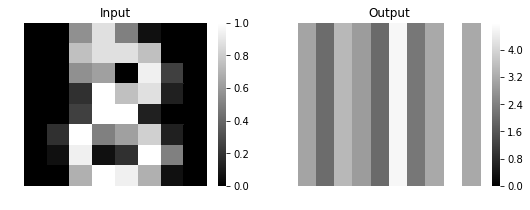

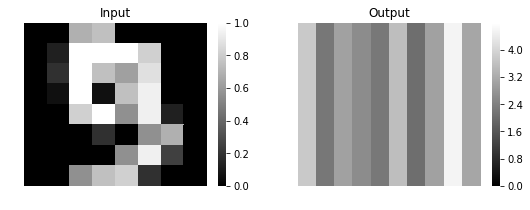

In [16]:
vmax = max(1.0, outputs.max())

for image, output in zip(X[:10], outputs[:10]):
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    ax = axes[0]    
    ax = sns.heatmap(image, vmin=0.0, vmax=1.0, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Input')
    
    ax = axes[1]    
    ax = sns.heatmap(output, vmin=0.0, vmax=vmax, cmap='gray', ax=ax)
    ax.set_axis_off()
    ax.set(title='Output')